<a href="https://colab.research.google.com/github/muhammadefan/just_do_it/blob/main/Classification%20%5BImage%5D%20-%20Handwritten%20Digit%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

by Muhammad Efan Abdulfattah

here i'm using MNIST Digit dataset from Keras

```
this model can be improved again by adding more layers or adding regularization (dropout, lasso or ridge, etc.) or tuning the hyperparams
```

### Data Preparation

In [ ]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.datasets import mnist
from google.colab.patches import cv2_imshow

%matplotlib inline

In [ ]:
# load data for training & validation
(X_train, y_train), (X_val, y_val) = mnist.load_data()

# data shape preview
print(f'\nX_train: {X_train.shape}\ny_train: {y_train.shape}\n\nX_val  : {X_val.shape}\ny_val  : {y_val.shape}')

11501568/11490434 [==============================] - 0s 0us/step

X_train: (60000, 28, 28)
y_train: (60000,)

X_val  : (10000, 28, 28)
y_val  : (10000,)


In [ ]:
# split training data for training & testing
X_train = X_train[:-500] # excluding last 500 data
y_train = y_train[:-500]

X_test = X_train[-500:] # including last 500 data
y_test = y_train[-500:]


# final data distribution
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}\n\nX_val  : \
{X_val.shape}\ny_val  : {y_val.shape}\n\nX_test : {X_test.shape}\ny_test : {y_test.shape}')

X_train: (59500, 28, 28)
y_train: (59500,)

X_val  : (10000, 28, 28)
y_val  : (10000,)

X_test : (500, 28, 28)
y_test : (500,)


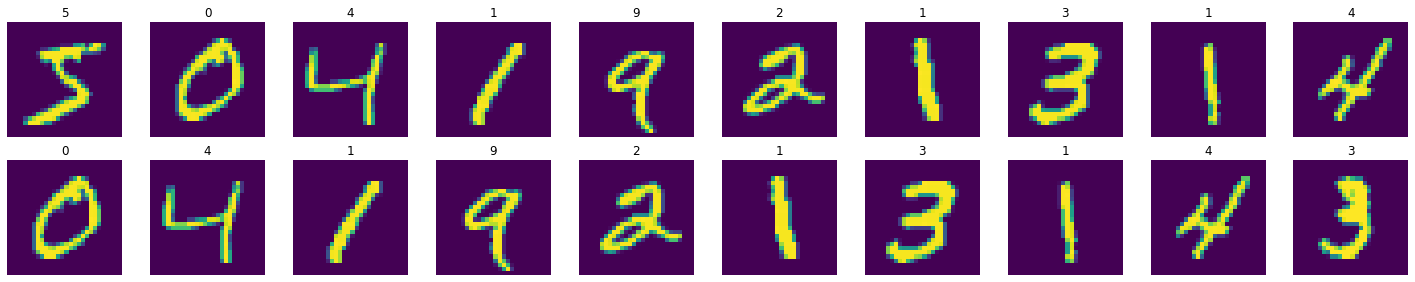

In [ ]:
# traning data preview
n_rows = 2
n_cols = 10

fig,ax = plt.subplots(figsize=(20,4),nrows=n_rows,ncols=n_cols)

for row in range(n_rows):
  for col in range(n_cols):
    ax[row,col].imshow(X_train[row+col])
    ax[row,col].set_title(y_train[row+col])
    ax[row,col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# reshape data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# data shape preview
print(f'X_train: {X_train.shape}\nX_val  : {X_val.shape}\nX_test : {X_test.shape}')

X_train: (59500, 28, 28, 1)
X_val  : (10000, 28, 28, 1)
X_test : (500, 28, 28, 1)


### Data Modelling

#### **training phase**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# build model
model = Sequential([Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
                    MaxPooling2D(),

                    Conv2D(64, kernel_size=(3,3), activation='relu'),
                    MaxPooling2D(),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

# model preview
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
# compiling parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# define path to directory
path='/content/drive/MyDrive/superprof/2/'

TRAIN_OR_NOT = True
if TRAIN_OR_NOT == True:
  # training phase
  history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=32,
                      epochs=10,
                      verbose=1
                      )
elif TRAIN_OR_NOT == False:
  # load weight
  model.load_weights(path+'mnist-weight.h5')
  print('weight loaded')

Epoch 1/10
1860/1860 [==============================] - 37s 3ms/step - loss: 0.2490 - accuracy: 0.9546 - val_loss: 0.0592 - val_accuracy: 0.9811
Epoch 2/10
1860/1860 [==============================] - 6s 3ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0506 - val_accuracy: 0.9837
Epoch 3/10
1860/1860 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.0466 - val_accuracy: 0.9849
Epoch 4/10
1860/1860 [==============================] - 6s 3ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0526 - val_accuracy: 0.9835
Epoch 5/10
1860/1860 [==============================] - 6s 3ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0456 - val_accuracy: 0.9883
Epoch 6/10
1860/1860 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9914 - val_loss: 0.0469 - val_accuracy: 0.9870
Epoch 7/10
1860/1860 [==============================] - 6s 3ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0552 - val_accuracy

#### **evaluating phase**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

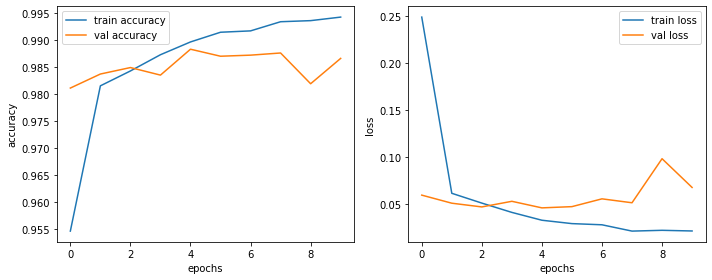

In [ ]:
# accuracy and loss trend over epoch
try:
  fig,ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

  ax[0].plot(history.history['accuracy'])
  ax[0].plot(history.history['val_accuracy'])
  ax[0].legend(['train accuracy','val accuracy'])
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')

  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'])
  ax[1].legend(['train loss','val loss'])
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')

  plt.tight_layout()
  plt.show()
  
except:
  print('no data recorded')

In [ ]:
# do prediction
y_pred = model.predict(X_test)

# find highest prediction probability for each X_test
prediction=[]
for pred in y_pred:
  prediction.append(np.argmax(pred))

# convert it into array
prediction = np.array(prediction)

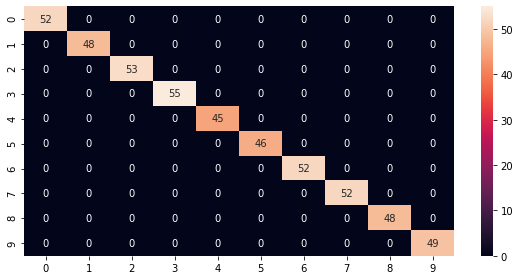

In [ ]:
# show confusion matrix
plt.figure(figsize=(8,4))

cm = confusion_matrix(prediction,y_test)
sns.heatmap(cm,annot=True)

plt.tight_layout()
plt.show()

In [ ]:
# more detailed prediction score
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        52
           8       1.00      1.00      1.00        48
           9       1.00      1.00      1.00        49

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
if TRAIN_OR_NOT == True:
  # save model
  model.save(path+'mnist-model.h5')
  # save weight
  model.save_weights(path+'mnist-weight.h5')
elif TRAIN_OR_NOT == False:
  print('skipped')

#### **testing phase**

##### **testing on y_test**

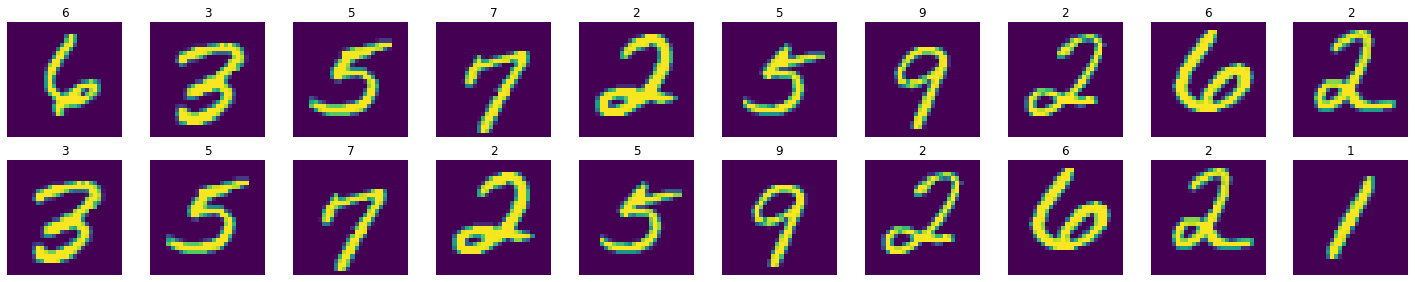

In [ ]:
# predicted data preview
n_rows = 2
n_cols = 10

fig,ax = plt.subplots(figsize=(20,4),nrows=n_rows,ncols=n_cols)

for row in range(n_rows):
  for col in range(n_cols):
    ax[row,col].imshow(X_test[row+col].reshape(28,28))
    ax[row,col].set_title(np.argmax(y_pred[row+col]))
    ax[row,col].axis('off')

plt.tight_layout()
plt.show()

##### **testing by drawing number on canvas**

In [ ]:
import cv2
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image

In [ ]:
canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.jpg', w=300, h=300, line_width=20):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

# execute function
draw()

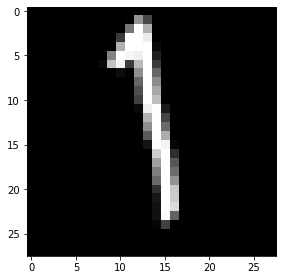


the number is: 1


In [ ]:
# load image
img = Image.open('drawing.jpg')
img = np.array(img)[:,:,3]
# resize image
img_resize = cv2.resize(img, (28, 28),interpolation = cv2.INTER_AREA) 
# show image
plt.imshow(img_resize, cmap='gray')
plt.show()


# do prediction
y_pred = model.predict(img_resize.reshape((1,28,28,1)))
print(f'\nthe number is: {str(np.argmax(y_pred[0]))}')